In [1]:
import numpy as np
from ExtendedTSSRP import ExtendedTSSRP
from MSSRP import MSSRP
from TSSRP import TSSRP
from spc.spc import spc
import time
nmodels = 3
model_all = [[] for i in range(nmodels)]
model_name = ['E_srp_T2','E_srp_T1_Max','srp_M']

# Solar 

In [2]:
import scipy.io as io
import matplotlib.pyplot as plt
import numpy as np
data = io.loadmat('data/solar.mat')
X_org_1 = data['data']

In [3]:
T0 = 200
dX = np.diff(X_org_1,n=1,axis=-1)
mdX = np.mean(dX[:,:,:T0],axis=-1)
X1 = dX - mdX[:,:,np.newaxis]
X2 = X1/np.std(X1)
X = np.rollaxis(X2,2,0)
X_org = np.rollaxis(X_org_1, 2,0)
nt,nx,ny = X.shape

In [4]:
from Bspline import bsplineBasis
k0 = 10
degree = 1 # Overlap region? (Size of B-spline basis) 
Bx = bsplineBasis(nx,k0-degree+1,degree)
By = bsplineBasis(ny,k0-degree+1,degree)
M = np.kron(Bx,By)

In [5]:
p = nx*ny # Number of dimensions
c = 1 # Target meanshift is c * M
k = M.shape[1] # Number of failuer Mode
Ks = 10   #Select Top Ks control chart
nsensors = 2000 # Number of selected sensors
model_all[0] = ExtendedTSSRP(p, c, k, M, nsensors, Ks, L=-1, chart = 'srp',mode='T2')
model_all[1] = ExtendedTSSRP(p, c, k, M, nsensors, Ks, L=-1, chart = 'srp',mode='T1_Max')
model_all[2] = MSSRP(p, c, k, M, nsensors, Ks, L=-1, chart = 'srp',mode='T2')

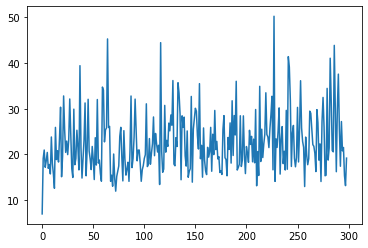

In [7]:
sequential_statistics_topRsum, sensor_selection_history, failure_mode_history, i,sequential_statistics= model_all[0].compute_monitoring_statistics(X.reshape((nt,nx*ny)),T0,-1)
plt.plot(sequential_statistics_topRsum)

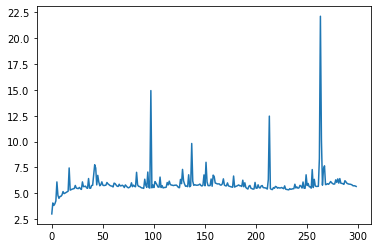

In [8]:
sequential_statistics_topRsum, sensor_selection_history, failure_mode_history, i,sequential_statistics= model_all[1].compute_monitoring_statistics(X.reshape((nt,nx*ny)),T0,-1)
plt.plot(sequential_statistics_topRsum)

In [ ]:
sequential_statistics_topRsum, sensor_selection_history, failure_mode_history, i,sequential_statistics= model_all[2].compute_monitoring_statistics(X.reshape((nt,nx*ny)),T0,-1)
plt.plot(sequential_statistics_topRsum)